# Renewable Energy Data Analysis Project
## Below is work done by Anish Neethi Ganesh for the Coursera X UMich Introduction to Data Science Assignment #3

In [215]:
import pandas as pd
import numpy as np
import sys
import regex as re
import matplotlib as plt
from decimal import Decimal


# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`. Additionally, there are several countries with Numeric digits in their name. Make sure to remove these as well, e.g. `'Italy9'` should be `'Italy'`. 

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [216]:
def remove_num_special_char(title : str):
    title = str(title)
    reg_ex = r"[0-9]|\(.*?\)"
    return re.sub(reg_ex, "", title).strip()



Energy = (pd.read_excel(io="assets/Energy Indicators.xls",
                                sheet_name=0, 
                                skiprows=18,
                                header=None, 
                                names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'], 
                                usecols="C:F", 
                                engine="xlrd", 
                                na_values="...", 
                                skipfooter=38))


Energy["Country"] = Energy['Country'].apply(remove_num_special_char)


country_map = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
Energy['Country'] = Energy['Country'].replace(country_map)

Energy["Energy Supply"] = pd.to_numeric(Energy['Energy Supply'], errors="coerce") * 1000000
Energy['Energy Supply per Capita'] = pd.to_numeric(Energy['Energy Supply per Capita'], errors='coerce')
Energy['% Renewable'] = pd.to_numeric(Energy['% Renewable'], errors='coerce')


Energy.set_index("Country", inplace=True)


GDP = (pd.read_csv(filepath_or_buffer="assets/world_bank.csv", 
                   sep=",", 
                   header=4,
                   index_col=0))
(GDP.rename(
    index={"Korea, Rep.": "South Korea",
            "Iran, Islamic Rep.": "Iran",
            "Hong Kong SAR, China": "Hong Kong"},
    inplace=True
))
GDP

ScimEn = (pd.read_excel(io="assets/scimagojr-3.xlsx",
                        index_col=1,
                        engine="openpyxl",
))
ScimEn


Energy_GDP = pd.merge(left=Energy, right=GDP, how="left", left_index=True, right_index=True)
Energy_GDP

Energy_GDP_ScimEn = pd.merge(left=ScimEn, right=Energy_GDP, how="left", left_index=True, right_index=True)
Energy_GDP_ScimEn = Energy_GDP_ScimEn[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
Energy_GDP_ScimEn_T15 = Energy_GDP_ScimEn.drop(Energy_GDP_ScimEn.index[15:])
Energy_GDP_ScimEn_T15



,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [217]:
Energy
# GDP
# ScimEn

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650
...,...,...,...
Viet Nam,2.554000e+09,28.0,45.321520
Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
Yemen,3.440000e+08,13.0,0.000000


In [218]:

print(remove_num_special_char("ca9me4n_3isla5nd's(noway)"))

camen_island's


In [219]:
def remove_num_special_char(title : str):
    title = str(title)
    reg_ex = r"[0-9]|\(.*?\)"
    return re.sub(reg_ex, "", title).strip()


def answer_one():


    Energy = (pd.read_excel(io="assets/Energy Indicators.xls",
                                    sheet_name=0, 
                                    skiprows=17,
                                    header=None, 
                                    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'], 
                                    usecols="C:F", 
                                    engine="xlrd", 
                                    na_values="...", 
                                    skipfooter=38))


    Energy["Country"] = Energy['Country'].apply(remove_num_special_char)


    country_map = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    }
    Energy['Country'] = Energy['Country'].replace(country_map)

    Energy["Energy Supply"] = pd.to_numeric(Energy['Energy Supply'], errors="coerce") * 1000000
    Energy['Energy Supply per Capita'] = pd.to_numeric(Energy['Energy Supply per Capita'], errors='coerce')
    Energy['% Renewable'] = pd.to_numeric(Energy['% Renewable'], errors='coerce')


    Energy.set_index("Country", inplace=True)


    GDP = (pd.read_csv(filepath_or_buffer="assets/world_bank.csv", 
                    sep=",", 
                    header=4,
                    index_col=0))
    (GDP.rename(
        index={"Korea, Rep.": "South Korea",
                "Iran, Islamic Rep.": "Iran",
                "Hong Kong SAR, China": "Hong Kong"},
        inplace=True
    ))
    

    ScimEn = (pd.read_excel(io="assets/scimagojr-3.xlsx",
                            index_col=1,
                            engine="openpyxl",
    ))
    


    Energy_GDP = pd.merge(left=Energy, right=GDP, how="left", left_index=True, right_index=True)


    Energy_GDP_ScimEn = pd.merge(left=ScimEn, right=Energy_GDP, how="left", left_index=True, right_index=True)
    Energy_GDP_ScimEn = Energy_GDP_ScimEn[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    Energy_GDP_ScimEn_T15 = Energy_GDP_ScimEn.drop(Energy_GDP_ScimEn.index[15:])
    return Energy_GDP_ScimEn_T15



In [220]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [221]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [222]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [223]:

print(Energy,len(Energy.index), len(GDP.index), len(ScimEn.index))

                           Energy Supply  Energy Supply per Capita  \
Country                                                              
Afghanistan                 3.210000e+08                      10.0   
Albania                     1.020000e+08                      35.0   
Algeria                     1.959000e+09                      51.0   
American Samoa                       NaN                       NaN   
Andorra                     9.000000e+06                     121.0   
...                                  ...                       ...   
Viet Nam                    2.554000e+09                      28.0   
Wallis and Futuna Islands   0.000000e+00                      26.0   
Yemen                       3.440000e+08                      13.0   
Zambia                      4.000000e+08                      26.0   
Zimbabwe                    4.800000e+08                      32.0   

                           % Renewable  
Country                                 
Afghani

In [224]:
# print(f'ALL:{len(Energy_GDP_ScimEn.index)}\nEnergy:{len(Energy.index)}\nGDP:{len(GDP.index)}\nSci:{len(ScimEn.index)}')

# max(len(Energy.index) - len(Energy_GDP_ScimEn.index), len(GDP.index) - len(Energy_GDP_ScimEn.index), len(ScimEn.index) - len(Energy_GDP_ScimEn.index))

all_countries = set(Energy.index).union(set(GDP.index), set(ScimEn.index))
intersect_countries = set(Energy.index).intersection(set(GDP.index), set(ScimEn.index))
print(len(all_countries), len(intersect_countries))
dif = len(all_countries) - len(intersect_countries)
dif

319 161


158

In [225]:
def answer_two():
    all_countries = set(Energy.index).union(set(GDP.index), set(ScimEn.index))
    intersect_countries = set(Energy.index).intersection(set(GDP.index), set(ScimEn.index))

    dif = len(all_countries) - len(intersect_countries)
    return dif


In [226]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [227]:
Energy_GDP_ScimEn.T

Country,China,United States,Japan,United Kingdom,Russian Federation,Canada,Germany,India,France,South Korea,...,Gibraltar,Maldives,Gambia,Belize,Palau,Guyana,Christmas Island,Reunion,Saint Lucia,Mauritania
Rank,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,...,182.0,1.830000e+02,184.0,1.850000e+02,1.860000e+02,1.870000e+02,188.0,189.0,190.0,1.910000e+02
Documents,1.270500e+05,9.666100e+04,3.050400e+04,2.094400e+04,1.853400e+04,1.789900e+04,1.702700e+04,1.500500e+04,1.315300e+04,1.198300e+04,...,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.000000e+00
Citable documents,1.267670e+05,9.474700e+04,3.028700e+04,2.035700e+04,1.830100e+04,1.762000e+04,1.683100e+04,1.484100e+04,1.297300e+04,1.192300e+04,...,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.000000e+00
Citations,5.972370e+05,7.922740e+05,2.230240e+05,2.060910e+05,3.426600e+04,2.150030e+05,1.405660e+05,1.287630e+05,1.306320e+05,1.146750e+05,...,0.0,1.000000e+00,0.0,6.000000e+00,0.000000e+00,0.000000e+00,0.0,2.0,0.0,1.000000e+00
Self-citations,4.116830e+05,2.654360e+05,6.155400e+04,3.787400e+04,1.242200e+04,4.093000e+04,2.742600e+04,3.720900e+04,2.860100e+04,2.259500e+04,...,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.000000e+00
Citations per document,4.700000e+00,8.200000e+00,7.310000e+00,9.840000e+00,1.850000e+00,1.201000e+01,8.260000e+00,8.580000e+00,9.930000e+00,9.570000e+00,...,0.0,1.000000e+00,0.0,6.000000e+00,0.000000e+00,0.000000e+00,0.0,2.0,0.0,1.000000e+00
H index,1.380000e+02,2.300000e+02,1.340000e+02,1.390000e+02,5.700000e+01,1.490000e+02,1.260000e+02,1.150000e+02,1.140000e+02,1.040000e+02,...,0.0,1.000000e+00,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0,0.0,1.000000e+00
Energy Supply,1.271910e+11,9.083800e+10,1.898400e+10,7.920000e+09,3.070900e+10,1.043100e+10,1.326100e+10,3.319500e+10,1.059700e+10,1.100700e+10,...,8000000.0,1.500000e+07,14000000.0,1.300000e+07,3.000000e+06,3.400000e+07,NaN,NaN,6000000.0,5.100000e+07
Energy Supply per Capita,9.300000e+01,2.860000e+02,1.490000e+02,1.240000e+02,2.140000e+02,2.960000e+02,1.650000e+02,2.600000e+01,1.660000e+02,2.210000e+02,...,245.0,4.300000e+01,7.0,3.900000e+01,1.520000e+02,4.500000e+01,NaN,NaN,33.0,1.300000e+01
% Renewable,1.975491e+01,1.157098e+01,1.023282e+01,1.060047e+01,1.728868e+01,6.194543e+01,1.790153e+01,1.496908e+01,1.702028e+01,2.279353e+00,...,0.0,0.000000e+00,0.0,6.469003e+01,1.875000e+01,0.000000e+00,NaN,NaN,0.0,0.000000e+00


In [228]:
# avgGDP = Energy_GDP_ScimEn.T.apply(lambda row : np.nanmean(row[10:19]))
# avgGDP.sort_values(ascending=False, inplace=True)
# avgGDP.name = "avgGDP"
# avgGDP[:15]

avgGDP = Energy_GDP_ScimEn.iloc[:,10:20].mean(axis=1).sort_values(ascending=False)
avgGDP

Country
United States       1.536434e+13
China               6.348609e+12
Japan               5.542208e+12
Germany             3.493025e+12
France              2.681725e+12
                        ...     
Gibraltar                    NaN
Gambia                       NaN
Christmas Island             NaN
Reunion                      NaN
Saint Lucia                  NaN
Length: 191, dtype: float64

In [229]:
def answer_three():
    temp = answer_one()
    avgGDP = (temp.iloc[:,10:20]
                  .mean(axis=1))
    avgGDP.sort_values(ascending=False, inplace=True)
    avgGDP.name = "avgGDP"
    return avgGDP
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [230]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [231]:
avgGDP = answer_three()
new_df = Energy_GDP_ScimEn.merge(avgGDP, on="Country")
new_df.sort_values(by="avgGDP", ascending=False, inplace=True)
sixth_country = new_df.iloc[5]
print(sixth_country, sixth_country[19], sixth_country[10])


Rank                        4.000000e+00
Documents                   2.094400e+04
Citable documents           2.035700e+04
Citations                   2.060910e+05
Self-citations              3.787400e+04
Citations per document      9.840000e+00
H index                     1.390000e+02
Energy Supply               7.920000e+09
Energy Supply per Capita    1.240000e+02
% Renewable                 1.060047e+01
2006                        2.419631e+12
2007                        2.482203e+12
2008                        2.470614e+12
2009                        2.367048e+12
2010                        2.403504e+12
2011                        2.450911e+12
2012                        2.479809e+12
2013                        2.533370e+12
2014                        2.605643e+12
2015                        2.666333e+12
avgGDP                      2.487907e+12
Name: United Kingdom, dtype: float64 2666333396477.13 2419630700401.73


In [232]:
def answer_four():
    avgGDP = answer_three()
    new_df = Energy_GDP_ScimEn.merge(avgGDP, on="Country")
    new_df.sort_values(by="avgGDP", ascending=False, inplace=True)
    sixth_country = new_df.iloc[5]
    return sixth_country[19] - sixth_country[10] 
answer_four()

np.float64(246702696075.3999)

In [233]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [234]:
def answer_five():
    t_15 = answer_one()
    mean_per_cap_energy = np.nanmean(t_15["Energy Supply per Capita"])
    return mean_per_cap_energy
answer_five()

np.float64(157.6)

In [235]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [236]:
sorted_energy = Energy.sort_values(by="% Renewable", ascending=False)
sorted_energy.reset_index(inplace=True)
sorted_energy
# print(sorted_energy.iloc[0]["Country"], sorted_energy.iloc[0]["% Renewable"])


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Bhutan,63000000.0,83.0,100.00000
1,Lesotho,48000000.0,23.0,100.00000
2,Albania,102000000.0,35.0,100.00000
3,Paraguay,228000000.0,35.0,99.99503
4,Iceland,312000000.0,957.0,99.97240
...,...,...,...,...
222,Northern Mariana Islands,NaN,NaN,0.00000
223,Niue,0.0,65.0,0.00000
224,Niger,87000000.0,5.0,0.00000
225,Nauru,1000000.0,60.0,0.00000


In [ ]:
def answer_six():
    temp = answer_one()
    sorted_energy = temp.sort_values(by="% Renewable", ascending=False)
    sorted_energy.reset_index(inplace=True)
    return (sorted_energy.iloc[0]["Country"], sorted_energy.iloc[0]["% Renewable"])


In [238]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [239]:
Energy_GDP_ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guyana,187,1,1,0,0,0.00,0,3.400000e+07,45.0,0.00000,1.919759e+09,2.054533e+09,2.095143e+09,2.164673e+09,2.259288e+09,2.382129e+09,2.496863e+09,2.627240e+09,2.728150e+09,2.810153e+09
Christmas Island,188,1,1,0,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reunion,189,1,1,2,1,2.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def answer_seven():
    t_15 = answer_one()
    cite_ratio = t_15["Self-citations"].divide(t_15["Citations"]).replace(np.inf, 0)
    cite_ratio.sort_values(ascending=False, inplace=True)
    cite_ratio = list(zip(cite_ratio.index, cite_ratio))
    return cite_ratio[0]

In [242]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [ ]:
def answer_eight():
    temp_EGS = answer_one()

    temp_EGS['PopEst'] =  temp_EGS['Energy Supply'] / temp_EGS['Energy Supply per Capita']
    pop_est = temp_EGS['PopEst'].sort_values(ascending=False)
    return pop_est.index[2]

In [245]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [265]:
def answer_nine():
    top_15 = answer_one()
    top_15["Pop Est"] = top_15["Energy Supply"] / top_15["Energy Supply per Capita"]
    top_15["Pop Est"].replace(0, np.nan, inplace=True)
    doc_per_cap = top_15["Citable documents"].div(top_15["Pop Est"], fill_value=1)
    return doc_per_cap.corr(top_15["Energy Supply per Capita"])

answer_nine()

np.float64(0.7940010435442945)

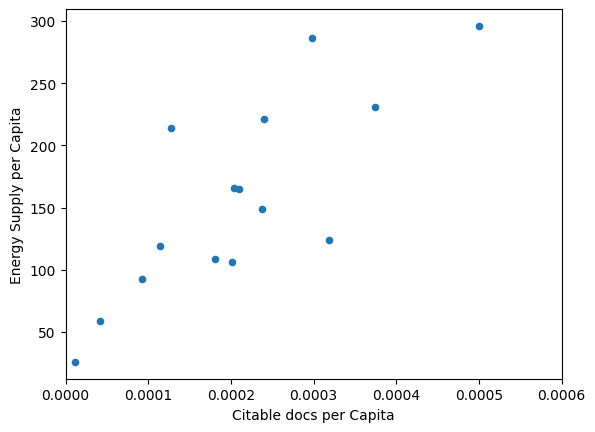

In [248]:
def plot9():
    %matplotlib inline

    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

In [249]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [250]:
med = np.nanmedian(Energy_GDP_ScimEn_T15["% Renewable"])


HighRenew = Energy_GDP_ScimEn["% Renewable"].apply(lambda row: 1 if row >= med else 0)
HighRenew.name = "HighRenew"
HighRenew.index
print(med,HighRenew)


17.02028 Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
                     ..
Guyana                0
Christmas Island      0
Reunion               0
Saint Lucia           0
Mauritania            0
Name: HighRenew, Length: 191, dtype: int64


In [268]:
def answer_ten():
    T15 = answer_one()
    med = np.nanmedian(T15["% Renewable"])

    T15 = T15.sort_values(by="Rank")
    HighRenew = (T15["% Renewable"]
                .apply(lambda row: 1 if row >= med else 0))
    HighRenew.name = "HighRenew"

    return HighRenew

answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [252]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [253]:
ContinentDict = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

t15 = answer_one()
t15["Continent"] = t15.index.map(ContinentDict)
t15.reset_index(inplace=True)
t15["Estimated Population"] = t15["Energy Supply"] / t15["Energy Supply per Capita"]
result = t15.groupby(by="Continent")["Estimated Population"].agg(['size', 'sum', 'mean', 'std'])
result

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [254]:
def answer_eleven():
    ContinentDict = {'China':'Asia', 
                    'United States':'North America', 
                    'Japan':'Asia', 
                    'United Kingdom':'Europe', 
                    'Russian Federation':'Europe', 
                    'Canada':'North America', 
                    'Germany':'Europe', 
                    'India':'Asia',
                    'France':'Europe', 
                    'South Korea':'Asia', 
                    'Italy':'Europe', 
                    'Spain':'Europe', 
                    'Iran':'Asia',
                    'Australia':'Australia', 
                    'Brazil':'South America'}

    t15 = answer_one()
    t15["Continent"] = t15.index.map(ContinentDict)
    t15.reset_index(inplace=True)
    t15["Estimated Population"] = t15["Energy Supply"] / t15["Energy Supply per Capita"]
    return t15.groupby(by="Continent")["Estimated Population"].agg(['size', 'sum', 'mean', 'std'])

In [255]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [276]:
ContinentDict = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

t15 = answer_one()
t15["Continent"] = t15.index.map(ContinentDict)
t15.reset_index(inplace=True)
t15["% Renewable Bins"] = pd.cut(t15["% Renewable"], 5)

t15 = t15.groupby(by=["Continent", "% Renewable Bins"]).size()
t15.index.names = ["Continent", "% Renewable"]



In [277]:
def answer_twelve():
    ContinentDict = {'China':'Asia', 
                    'United States':'North America', 
                    'Japan':'Asia', 
                    'United Kingdom':'Europe', 
                    'Russian Federation':'Europe', 
                    'Canada':'North America', 
                    'Germany':'Europe', 
                    'India':'Asia',
                    'France':'Europe', 
                    'South Korea':'Asia', 
                    'Italy':'Europe', 
                    'Spain':'Europe', 
                    'Iran':'Asia',
                    'Australia':'Australia', 
                    'Brazil':'South America'}

    t15 = answer_one()
    t15["Continent"] = t15.index.map(ContinentDict)
    t15.reset_index(inplace=True)
    t15["% Renewable Bins"] = pd.cut(t15["% Renewable"], 5)

    t15 = t15.groupby(by=["Continent", "% Renewable Bins"]).size()
    t15.index.names = ["Continent", "% Renewable"]
    return t15

answer_twelve()



Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

In [258]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 25, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [259]:
def thousands_sep(pop):
    pop_decimal = Decimal(str(pop))
    
    pop = f'{pop_decimal:.2f}'
    count = 0
    for index  in range(len(pop) - 4, 0, -1):
        count += 1
        if count % 3 == 0:
            pop = pop[:index] + ',' + pop[index:]
            index += 1 
    return pop

thousands_sep(123456789999999999999.90)   

t15 = answer_one()
t15["Pop Est"] = t15["Energy Supply"] / t15["Energy Supply per Capita"]
PopEst = t15["Pop Est"].apply(thousands_sep)
PopEst




Country
China                 1,367,645,161.29
United States           317,615,384.62
Japan                   127,409,395.97
United Kingdom           63,870,967.74
Russian Federation      143,500,000.00
Canada                   35,239,864.86
Germany                  80,369,696.97
India                 1,276,730,769.23
France                   63,837,349.40
South Korea              49,805,429.86
Italy                    59,908,256.88
Spain                    46,443,396.23
Iran                     77,075,630.25
Australia                23,316,017.32
Brazil                  205,915,254.24
Name: Pop Est, dtype: object

In [260]:
def thousands_sep(pop):
    pop_decimal = Decimal(str(pop))
    
    pop = f'{pop_decimal:.2f}'
    count = 0
    for index  in range(len(pop) - 4, 0, -1):
        count += 1
        if count % 3 == 0:
            pop = pop[:index] + ',' + pop[index:]
            index += 1 
    return pop

def answer_thirteen():
    
    t15 = answer_one()
    t15["Pop Est"] = t15["Energy Supply"] / t15["Energy Supply per Capita"]
    PopEst = t15["Pop Est"].apply(thousands_sep)
    return PopEst
    

In [261]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


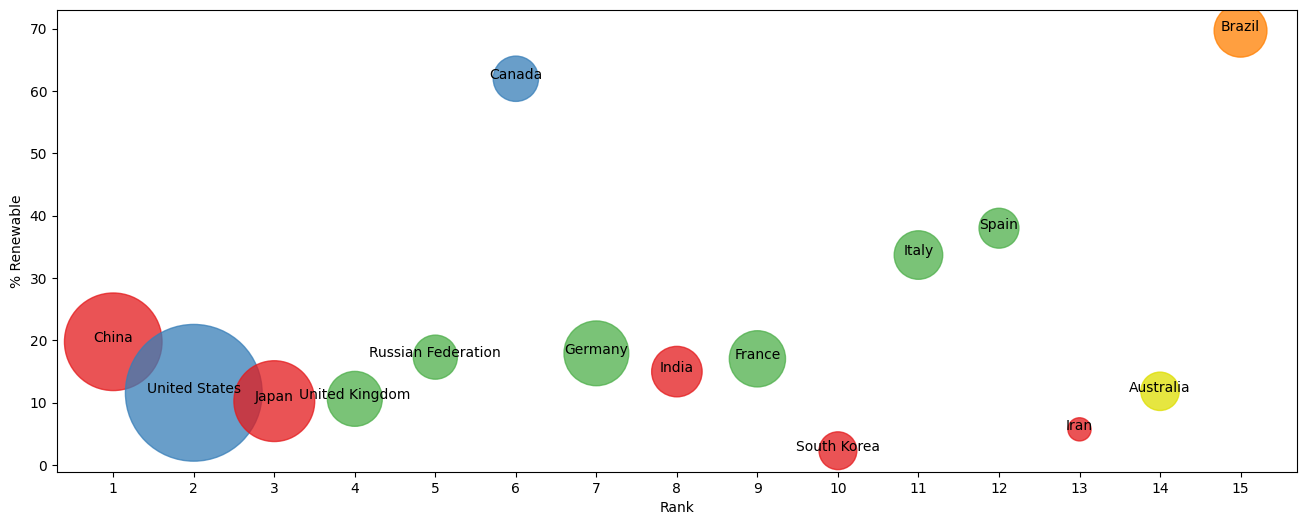

In [262]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of" \
" the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_optional()